In [96]:
import pandas as pd 
import numpy as np
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt
import pickle

In [97]:
songs = pd.read_csv('songs.csv')

In [98]:
display(songs)

,artist,title,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,...,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,hot
0,Taylor Swift,Anti-Hero,0.637,0.643,4,-6.571,1,0.0519,0.1300,0.000002,...,0.5330,97.008,audio_features,0V3wPSX9ygBnCm8psDIegu,spotify:track:0V3wPSX9ygBnCm8psDIegu,https://api.spotify.com/v1/tracks/0V3wPSX9ygBn...,https://api.spotify.com/v1/audio-analysis/0V3w...,200690,4,1
1,Taylor Swift,Lavender Haze,0.733,0.436,10,-10.489,1,0.0800,0.2580,0.000573,...,0.0976,96.985,audio_features,5jQI2r1RdgtuT8S3iG8zFC,spotify:track:5jQI2r1RdgtuT8S3iG8zFC,https://api.spotify.com/v1/tracks/5jQI2r1Rdgtu...,https://api.spotify.com/v1/audio-analysis/5jQI...,202396,4,1
2,Taylor Swift,Maroon,0.637,0.398,7,-8.294,1,0.0564,0.0573,0.000001,...,0.0374,108.075,audio_features,3eX0NZfLtGzoLUxPNvRfqm,spotify:track:3eX0NZfLtGzoLUxPNvRfqm,https://api.spotify.com/v1/tracks/3eX0NZfLtGzo...,https://api.spotify.com/v1/audio-analysis/3eX0...,218271,4,1
3,Taylor Swift,Midnight Rain,0.643,0.363,0,-11.738,1,0.0767,0.6900,0.000052,...,0.2300,139.865,audio_features,3rWDp9tBPQR9z6U5YyRSK4,spotify:track:3rWDp9tBPQR9z6U5YyRSK4,https://api.spotify.com/v1/tracks/3rWDp9tBPQR9...,https://api.spotify.com/v1/audio-analysis/3rWD...,174783,4,1
4,Taylor Swift,Bejeweled,0.700,0.550,7,-9.130,1,0.0653,0.0661,0.000102,...,0.4120,164.003,audio_features,0jvo9CjnbR0lYUDTSNTMiu,spotify:track:0jvo9CjnbR0lYUDTSNTMiu,https://api.spotify.com/v1/tracks/0jvo9CjnbR0l...,https://api.spotify.com/v1/audio-analysis/0jvo...,194166,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2294,Daniel Norgren,Moonshine Got Me,0.458,0.497,8,-9.660,1,0.0479,0.7160,0.155000,...,0.1440,107.748,audio_features,6LrxNNCaqssGmyCGi1EPJA,spotify:track:6LrxNNCaqssGmyCGi1EPJA,https://api.spotify.com/v1/tracks/6LrxNNCaqssG...,https://api.spotify.com/v1/audio-analysis/6Lrx...,531333,4,0
2295,Dover,Serenade me,0.524,0.776,5,-6.193,0,0.0404,0.0330,0.000022,...,0.3010,123.622,audio_features,4tzi4VV1vCTZsT4SEKQIKJ,spotify:track:4tzi4VV1vCTZsT4SEKQIKJ,https://api.spotify.com/v1/tracks/4tzi4VV1vCTZ...,https://api.spotify.com/v1/audio-analysis/4tzi...,234280,4,0
2296,Queen,I want it all,0.402,0.835,11,-5.734,0,0.0500,0.0287,0.000003,...,0.4300,92.029,audio_features,5AaGovcNgVcreY5GHmv3u3,spotify:track:5AaGovcNgVcreY5GHmv3u3,https://api.spotify.com/v1/tracks/5AaGovcNgVcr...,https://api.spotify.com/v1/audio-analysis/5AaG...,241253,4,0
2297,Sultans of Ping FC,Where's me jumper?,0.395,0.914,11,-6.706,0,0.1590,0.0728,0.000000,...,0.4350,174.284,audio_features,1PWkvrHtJI1TLfnZDWDf2u,spotify:track:1PWkvrHtJI1TLfnZDWDf2u,https://api.spotify.com/v1/tracks/1PWkvrHtJI1T...,https://api.spotify.com/v1/audio-analysis/1PWk...,189213,4,0


In [99]:
songsn=songs.drop(['mode','type','time_signature', 'id', 'uri', 'track_href', 'analysis_url','duration_ms','hot'], axis=1)

In [100]:
songsn.describe()

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000
mean,0.603672,0.595231,5.073945,-9.054452,0.060825,0.333831,0.060518,0.185897,0.604919,118.367838
std,0.162868,0.229733,3.568638,3.837153,0.062196,0.321120,0.186724,0.155202,0.252399,26.882526
min,0.000000,0.019000,0.000000,-37.841000,0.000000,0.000011,0.000000,0.012400,0.000000,0.000000
25%,0.500000,0.445000,2.000000,-11.410500,0.031800,0.048100,0.000000,0.088100,0.403500,99.412500
50%,0.622000,0.625000,5.000000,-8.620000,0.039900,0.210000,0.000027,0.128000,0.632000,117.046000
75%,0.722000,0.777000,8.000000,-6.214000,0.060000,0.593000,0.002465,0.242000,0.819500,132.069000
max,0.979000,0.997000,11.000000,-0.810000,0.817000,0.996000,0.985000,0.989000,0.986000,210.857000


In [101]:
songsn = songs[['danceability','energy','key', 'loudness', 'speechiness', 'acousticness', 'instrumentalness','liveness','valence', 'tempo']]
songsn

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.637,0.643,4,-6.571,0.0519,0.1300,0.000002,0.1420,0.5330,97.008
1,0.733,0.436,10,-10.489,0.0800,0.2580,0.000573,0.1570,0.0976,96.985
2,0.637,0.398,7,-8.294,0.0564,0.0573,0.000001,0.1010,0.0374,108.075
3,0.643,0.363,0,-11.738,0.0767,0.6900,0.000052,0.1150,0.2300,139.865
4,0.700,0.550,7,-9.130,0.0653,0.0661,0.000102,0.0910,0.4120,164.003
...,...,...,...,...,...,...,...,...,...,...
2294,0.458,0.497,8,-9.660,0.0479,0.7160,0.155000,0.0707,0.1440,107.748
2295,0.524,0.776,5,-6.193,0.0404,0.0330,0.000022,0.1470,0.3010,123.622
2296,0.402,0.835,11,-5.734,0.0500,0.0287,0.000003,0.3850,0.4300,92.029
2297,0.395,0.914,11,-6.706,0.1590,0.0728,0.000000,0.1250,0.4350,174.284


In [102]:
from sklearn.preprocessing import normalize
data_scaled = normalize(songsn)
data_scaled = pd.DataFrame(data_scaled, columns=songsn.columns)
data_scaled.head()

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.006546,0.006607,0.041102,-0.067521,0.000533,0.001336,1.849599e-08,0.001459,0.005477,0.996810
1,0.007475,0.004446,0.101972,-0.106959,0.000816,0.002631,5.843003e-06,0.001601,0.000995,0.988977
2,0.005864,0.003664,0.064444,-0.076357,0.000519,0.000528,9.482490e-09,0.000930,0.000344,0.994971
3,0.004581,0.002586,0.000000,-0.083627,0.000546,0.004916,3.683370e-07,0.000819,0.001639,0.996469
4,0.004258,0.003345,0.042577,-0.055532,0.000397,0.000402,6.204040e-07,0.000553,0.002506,0.997531


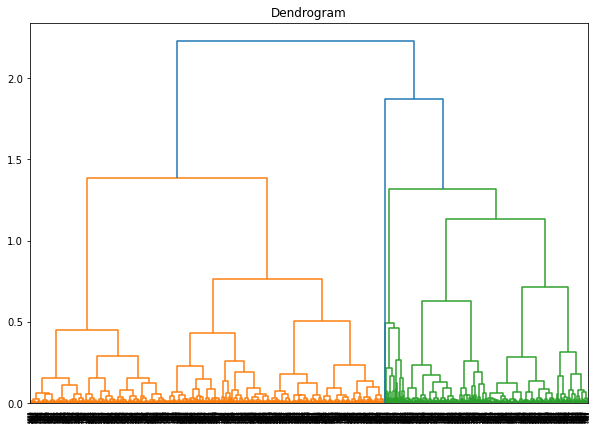

In [103]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrogram")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))

In [104]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=12, affinity='euclidean', linkage='ward')  
ypred=cluster.fit_predict(data_scaled)


In [105]:
with open("aggl12.pickle","wb") as file:
    pickle.dump(cluster,file)

In [106]:
songs['aggl_12']= ypred
songs

,artist,title,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,...,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,hot,aggl_12
0,Taylor Swift,Anti-Hero,0.637,0.643,4,-6.571,1,0.0519,0.1300,0.000002,...,97.008,audio_features,0V3wPSX9ygBnCm8psDIegu,spotify:track:0V3wPSX9ygBnCm8psDIegu,https://api.spotify.com/v1/tracks/0V3wPSX9ygBn...,https://api.spotify.com/v1/audio-analysis/0V3w...,200690,4,1,9
1,Taylor Swift,Lavender Haze,0.733,0.436,10,-10.489,1,0.0800,0.2580,0.000573,...,96.985,audio_features,5jQI2r1RdgtuT8S3iG8zFC,spotify:track:5jQI2r1RdgtuT8S3iG8zFC,https://api.spotify.com/v1/tracks/5jQI2r1Rdgtu...,https://api.spotify.com/v1/audio-analysis/5jQI...,202396,4,1,4
2,Taylor Swift,Maroon,0.637,0.398,7,-8.294,1,0.0564,0.0573,0.000001,...,108.075,audio_features,3eX0NZfLtGzoLUxPNvRfqm,spotify:track:3eX0NZfLtGzoLUxPNvRfqm,https://api.spotify.com/v1/tracks/3eX0NZfLtGzo...,https://api.spotify.com/v1/audio-analysis/3eX0...,218271,4,1,2
3,Taylor Swift,Midnight Rain,0.643,0.363,0,-11.738,1,0.0767,0.6900,0.000052,...,139.865,audio_features,3rWDp9tBPQR9z6U5YyRSK4,spotify:track:3rWDp9tBPQR9z6U5YyRSK4,https://api.spotify.com/v1/tracks/3rWDp9tBPQR9...,https://api.spotify.com/v1/audio-analysis/3rWD...,174783,4,1,1
4,Taylor Swift,Bejeweled,0.700,0.550,7,-9.130,1,0.0653,0.0661,0.000102,...,164.003,audio_features,0jvo9CjnbR0lYUDTSNTMiu,spotify:track:0jvo9CjnbR0lYUDTSNTMiu,https://api.spotify.com/v1/tracks/0jvo9CjnbR0l...,https://api.spotify.com/v1/audio-analysis/0jvo...,194166,4,1,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2294,Daniel Norgren,Moonshine Got Me,0.458,0.497,8,-9.660,1,0.0479,0.7160,0.155000,...,107.748,audio_features,6LrxNNCaqssGmyCGi1EPJA,spotify:track:6LrxNNCaqssGmyCGi1EPJA,https://api.spotify.com/v1/tracks/6LrxNNCaqssG...,https://api.spotify.com/v1/audio-analysis/6Lrx...,531333,4,0,2
2295,Dover,Serenade me,0.524,0.776,5,-6.193,0,0.0404,0.0330,0.000022,...,123.622,audio_features,4tzi4VV1vCTZsT4SEKQIKJ,spotify:track:4tzi4VV1vCTZsT4SEKQIKJ,https://api.spotify.com/v1/tracks/4tzi4VV1vCTZ...,https://api.spotify.com/v1/audio-analysis/4tzi...,234280,4,0,0
2296,Queen,I want it all,0.402,0.835,11,-5.734,0,0.0500,0.0287,0.000003,...,92.029,audio_features,5AaGovcNgVcreY5GHmv3u3,spotify:track:5AaGovcNgVcreY5GHmv3u3,https://api.spotify.com/v1/tracks/5AaGovcNgVcr...,https://api.spotify.com/v1/audio-analysis/5AaG...,241253,4,0,2
2297,Sultans of Ping FC,Where's me jumper?,0.395,0.914,11,-6.706,0,0.1590,0.0728,0.000000,...,174.284,audio_features,1PWkvrHtJI1TLfnZDWDf2u,spotify:track:1PWkvrHtJI1TLfnZDWDf2u,https://api.spotify.com/v1/tracks/1PWkvrHtJI1T...,https://api.spotify.com/v1/audio-analysis/1PWk...,189213,4,0,7


In [111]:
from sklearn.cluster import AgglomerativeClustering
cluster7 = AgglomerativeClustering(n_clusters=7, affinity='euclidean', linkage='ward')  
ypred7=cluster.fit_predict(data_scaled)


In [112]:
with open("aggl7.pickle","wb") as file:
    pickle.dump(cluster,file)

In [113]:
songs['aggl_7']= ypred7
songs

,artist,title,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,...,type,id,uri,track_href,analysis_url,duration_ms,time_signature,hot,aggl_12,aggl_7
0,Taylor Swift,Anti-Hero,0.637,0.643,4,-6.571,1,0.0519,0.1300,0.000002,...,audio_features,0V3wPSX9ygBnCm8psDIegu,spotify:track:0V3wPSX9ygBnCm8psDIegu,https://api.spotify.com/v1/tracks/0V3wPSX9ygBn...,https://api.spotify.com/v1/audio-analysis/0V3w...,200690,4,1,9,9
1,Taylor Swift,Lavender Haze,0.733,0.436,10,-10.489,1,0.0800,0.2580,0.000573,...,audio_features,5jQI2r1RdgtuT8S3iG8zFC,spotify:track:5jQI2r1RdgtuT8S3iG8zFC,https://api.spotify.com/v1/tracks/5jQI2r1Rdgtu...,https://api.spotify.com/v1/audio-analysis/5jQI...,202396,4,1,4,4
2,Taylor Swift,Maroon,0.637,0.398,7,-8.294,1,0.0564,0.0573,0.000001,...,audio_features,3eX0NZfLtGzoLUxPNvRfqm,spotify:track:3eX0NZfLtGzoLUxPNvRfqm,https://api.spotify.com/v1/tracks/3eX0NZfLtGzo...,https://api.spotify.com/v1/audio-analysis/3eX0...,218271,4,1,2,2
3,Taylor Swift,Midnight Rain,0.643,0.363,0,-11.738,1,0.0767,0.6900,0.000052,...,audio_features,3rWDp9tBPQR9z6U5YyRSK4,spotify:track:3rWDp9tBPQR9z6U5YyRSK4,https://api.spotify.com/v1/tracks/3rWDp9tBPQR9...,https://api.spotify.com/v1/audio-analysis/3rWD...,174783,4,1,1,1
4,Taylor Swift,Bejeweled,0.700,0.550,7,-9.130,1,0.0653,0.0661,0.000102,...,audio_features,0jvo9CjnbR0lYUDTSNTMiu,spotify:track:0jvo9CjnbR0lYUDTSNTMiu,https://api.spotify.com/v1/tracks/0jvo9CjnbR0l...,https://api.spotify.com/v1/audio-analysis/0jvo...,194166,4,1,7,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2294,Daniel Norgren,Moonshine Got Me,0.458,0.497,8,-9.660,1,0.0479,0.7160,0.155000,...,audio_features,6LrxNNCaqssGmyCGi1EPJA,spotify:track:6LrxNNCaqssGmyCGi1EPJA,https://api.spotify.com/v1/tracks/6LrxNNCaqssG...,https://api.spotify.com/v1/audio-analysis/6Lrx...,531333,4,0,2,2
2295,Dover,Serenade me,0.524,0.776,5,-6.193,0,0.0404,0.0330,0.000022,...,audio_features,4tzi4VV1vCTZsT4SEKQIKJ,spotify:track:4tzi4VV1vCTZsT4SEKQIKJ,https://api.spotify.com/v1/tracks/4tzi4VV1vCTZ...,https://api.spotify.com/v1/audio-analysis/4tzi...,234280,4,0,0,0
2296,Queen,I want it all,0.402,0.835,11,-5.734,0,0.0500,0.0287,0.000003,...,audio_features,5AaGovcNgVcreY5GHmv3u3,spotify:track:5AaGovcNgVcreY5GHmv3u3,https://api.spotify.com/v1/tracks/5AaGovcNgVcr...,https://api.spotify.com/v1/audio-analysis/5AaG...,241253,4,0,2,2
2297,Sultans of Ping FC,Where's me jumper?,0.395,0.914,11,-6.706,0,0.1590,0.0728,0.000000,...,audio_features,1PWkvrHtJI1TLfnZDWDf2u,spotify:track:1PWkvrHtJI1TLfnZDWDf2u,https://api.spotify.com/v1/tracks/1PWkvrHtJI1T...,https://api.spotify.com/v1/audio-analysis/1PWk...,189213,4,0,7,7


In [107]:
songs.shape

(2299, 22)

In [108]:
sorted_songs = songs.sort_values(by=['aggl_12'], ascending=False)
sorted_songs

,artist,title,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,...,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,hot,aggl_12
701,Louis Armstrong,Hello Dolly,0.000,0.4050,0,-9.935,1,0.0000,0.84200,0.001140,...,0.000,audio_features,63kd4m3VFxcJjPVVtbVNAu,spotify:track:63kd4m3VFxcJjPVVtbVNAu,https://api.spotify.com/v1/tracks/63kd4m3VFxcJ...,https://api.spotify.com/v1/audio-analysis/63kd...,147000,0,0,11
285,Bobby McFerrin,Don't Worry Be Happy,0.175,0.0281,10,-37.841,0,0.0635,0.98000,0.000000,...,60.298,audio_features,4J41s4m5s3dbFDvdgxcsdc,spotify:track:4J41s4m5s3dbFDvdgxcsdc,https://api.spotify.com/v1/tracks/4J41s4m5s3db...,https://api.spotify.com/v1/audio-analysis/4J41...,269636,4,0,10
0,Taylor Swift,Anti-Hero,0.637,0.6430,4,-6.571,1,0.0519,0.13000,0.000002,...,97.008,audio_features,0V3wPSX9ygBnCm8psDIegu,spotify:track:0V3wPSX9ygBnCm8psDIegu,https://api.spotify.com/v1/tracks/0V3wPSX9ygBn...,https://api.spotify.com/v1/audio-analysis/0V3w...,200690,4,1,9
1055,Billy Joel,Just the Way You Are,0.589,0.4530,7,-8.912,1,0.0397,0.70300,0.000025,...,139.148,audio_features,49MHCPzvMLXhRjDantBMVH,spotify:track:49MHCPzvMLXhRjDantBMVH,https://api.spotify.com/v1/tracks/49MHCPzvMLXh...,https://api.spotify.com/v1/audio-analysis/49MH...,290573,4,0,9
1872,Will To Power,"Baby, I Love Your Way",0.625,0.4350,7,-12.020,1,0.0286,0.02000,0.002450,...,150.832,audio_features,0kzSooCGpuphLwn8iTuO9h,spotify:track:0kzSooCGpuphLwn8iTuO9h,https://api.spotify.com/v1/tracks/0kzSooCGpuph...,https://api.spotify.com/v1/audio-analysis/0kzS...,247200,4,0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1841,Aerosmith,Livin' On the Edge,0.399,0.8810,2,-4.341,1,0.0347,0.00190,0.004290,...,84.580,audio_features,4avSaixVwu8uqfSs7zgoj3,spotify:track:4avSaixVwu8uqfSs7zgoj3,https://api.spotify.com/v1/tracks/4avSaixVwu8u...,https://api.spotify.com/v1/audio-analysis/4avS...,380893,4,0,0
1842,Shakin' Stevens,Oh Julie,0.480,0.9940,0,-2.072,1,0.1260,0.21100,0.000663,...,160.249,audio_features,2cO0A5kJ5l7y5XIpfopHEz,spotify:track:2cO0A5kJ5l7y5XIpfopHEz,https://api.spotify.com/v1/tracks/2cO0A5kJ5l7y...,https://api.spotify.com/v1/audio-analysis/2cO0...,154107,4,0,0
1193,Michael Jackson,The Way You Make Me Feel,0.877,0.8540,1,-4.523,1,0.1470,0.05440,0.000055,...,114.472,audio_features,0sKlV58cODrjxGFOyf9IXY,spotify:track:0sKlV58cODrjxGFOyf9IXY,https://api.spotify.com/v1/tracks/0sKlV58cODrj...,https://api.spotify.com/v1/audio-analysis/0sKl...,298120,4,0,0
158,Beyonce,Crazy in Love,0.646,0.7700,2,-6.596,0,0.2260,0.00249,0.000000,...,99.165,audio_features,5IVuqXILoxVWvWEPm82Jxr,spotify:track:5IVuqXILoxVWvWEPm82Jxr,https://api.spotify.com/v1/tracks/5IVuqXILoxVW...,https://api.spotify.com/v1/audio-analysis/5IVu...,236133,4,0,0


In [109]:
songs.to_csv('songs_aggl_12.csv', index=False)

In [110]:
pd.read_csv('songs_aggl_12.csv')

,artist,title,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,...,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,hot,aggl_12
0,Taylor Swift,Anti-Hero,0.637,0.643,4,-6.571,1,0.0519,0.1300,0.000002,...,97.008,audio_features,0V3wPSX9ygBnCm8psDIegu,spotify:track:0V3wPSX9ygBnCm8psDIegu,https://api.spotify.com/v1/tracks/0V3wPSX9ygBn...,https://api.spotify.com/v1/audio-analysis/0V3w...,200690,4,1,9
1,Taylor Swift,Lavender Haze,0.733,0.436,10,-10.489,1,0.0800,0.2580,0.000573,...,96.985,audio_features,5jQI2r1RdgtuT8S3iG8zFC,spotify:track:5jQI2r1RdgtuT8S3iG8zFC,https://api.spotify.com/v1/tracks/5jQI2r1Rdgtu...,https://api.spotify.com/v1/audio-analysis/5jQI...,202396,4,1,4
2,Taylor Swift,Maroon,0.637,0.398,7,-8.294,1,0.0564,0.0573,0.000001,...,108.075,audio_features,3eX0NZfLtGzoLUxPNvRfqm,spotify:track:3eX0NZfLtGzoLUxPNvRfqm,https://api.spotify.com/v1/tracks/3eX0NZfLtGzo...,https://api.spotify.com/v1/audio-analysis/3eX0...,218271,4,1,2
3,Taylor Swift,Midnight Rain,0.643,0.363,0,-11.738,1,0.0767,0.6900,0.000052,...,139.865,audio_features,3rWDp9tBPQR9z6U5YyRSK4,spotify:track:3rWDp9tBPQR9z6U5YyRSK4,https://api.spotify.com/v1/tracks/3rWDp9tBPQR9...,https://api.spotify.com/v1/audio-analysis/3rWD...,174783,4,1,1
4,Taylor Swift,Bejeweled,0.700,0.550,7,-9.130,1,0.0653,0.0661,0.000102,...,164.003,audio_features,0jvo9CjnbR0lYUDTSNTMiu,spotify:track:0jvo9CjnbR0lYUDTSNTMiu,https://api.spotify.com/v1/tracks/0jvo9CjnbR0l...,https://api.spotify.com/v1/audio-analysis/0jvo...,194166,4,1,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2294,Daniel Norgren,Moonshine Got Me,0.458,0.497,8,-9.660,1,0.0479,0.7160,0.155000,...,107.748,audio_features,6LrxNNCaqssGmyCGi1EPJA,spotify:track:6LrxNNCaqssGmyCGi1EPJA,https://api.spotify.com/v1/tracks/6LrxNNCaqssG...,https://api.spotify.com/v1/audio-analysis/6Lrx...,531333,4,0,2
2295,Dover,Serenade me,0.524,0.776,5,-6.193,0,0.0404,0.0330,0.000022,...,123.622,audio_features,4tzi4VV1vCTZsT4SEKQIKJ,spotify:track:4tzi4VV1vCTZsT4SEKQIKJ,https://api.spotify.com/v1/tracks/4tzi4VV1vCTZ...,https://api.spotify.com/v1/audio-analysis/4tzi...,234280,4,0,0
2296,Queen,I want it all,0.402,0.835,11,-5.734,0,0.0500,0.0287,0.000003,...,92.029,audio_features,5AaGovcNgVcreY5GHmv3u3,spotify:track:5AaGovcNgVcreY5GHmv3u3,https://api.spotify.com/v1/tracks/5AaGovcNgVcr...,https://api.spotify.com/v1/audio-analysis/5AaG...,241253,4,0,2
2297,Sultans of Ping FC,Where's me jumper?,0.395,0.914,11,-6.706,0,0.1590,0.0728,0.000000,...,174.284,audio_features,1PWkvrHtJI1TLfnZDWDf2u,spotify:track:1PWkvrHtJI1TLfnZDWDf2u,https://api.spotify.com/v1/tracks/1PWkvrHtJI1T...,https://api.spotify.com/v1/audio-analysis/1PWk...,189213,4,0,7
